In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def phi_fun(f, theta):
    return np.sqrt(1+0.5*(2 * np.sin(theta * (np.pi/180) + np.pi/4)**2 - 1)**2 * (np.cos(2 * np.pi * f * Dt) - 1))

In [3]:
f = np.arange(0, 20e6, 11.1115e3)
theta = np.arange(0, 180, 0.1)
Dt = 0.1*10**-6
phi = np.empty(len(f))

In [4]:
F, THETA = np.meshgrid(f, theta)

In [5]:
phi = np.array(phi_fun(np.ravel(F), np.ravel(THETA)))
phi_reshape = phi.reshape(F.shape)

In [6]:
phi_reshape.shape

(1800, 1800)

In [7]:
f

array([0.00000000e+00, 1.11115000e+04, 2.22230000e+04, ...,
       1.99673655e+07, 1.99784770e+07, 1.99895885e+07])

In [8]:
for f in F:
    phi = np.vstack((phi, phi_fun(f, theta)))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3240000 and the array at index 1 has size 1800

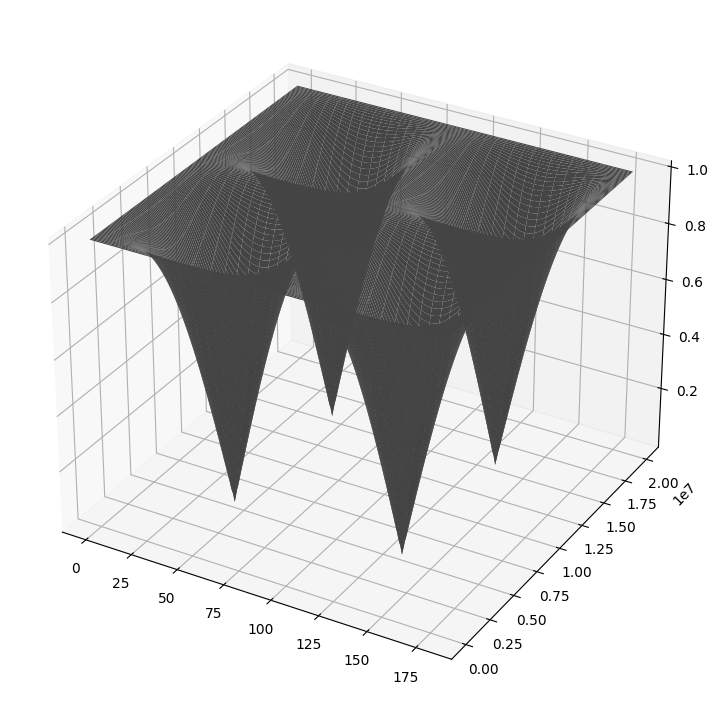

In [9]:
fig = plt.figure(figsize = (14,9))
ax = plt.axes(projection = '3d')

ax.plot_surface(THETA, F, phi_reshape, rstride=50,   linewidth=1, color = 'grey', antialiased=True)

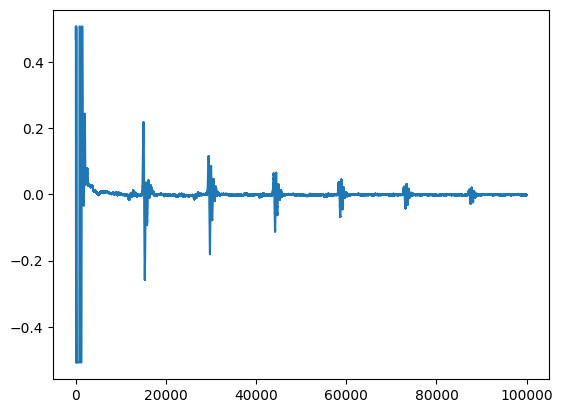

In [10]:
data_original = pd.read_table("0.txt", header = None,  decimal=',')
plt.plot(data_original)

In [11]:
inicio = 10000
final = 10000
data_modificado = pd.DataFrame(data_original[0].iloc[inicio:] - data_original[0].iloc[inicio:].mean())
data_modificado = data_modificado.reset_index(drop = True)
data_modificado

,0
0,0.004099
1,0.003864
2,0.003802
3,0.003395
4,0.003333
...,...
89995,0.000177
89996,-0.000105
89997,-0.000730
89998,-0.000042


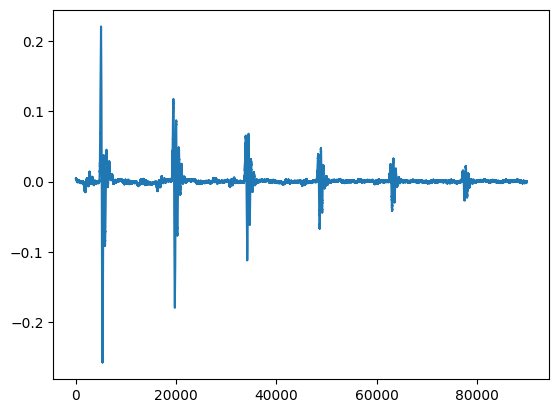

In [13]:
plt.plot(data_modificado[0])

In [ ]:
amplitude_filtro = 0.014
data_modificado.loc[data_modificado[0].abs() < amplitude_filtro, 'tratado'] = 0.0
data_modificado.loc[data_modificado[0].abs() > amplitude_filtro, 'tratado'] = data_modificado[0].loc[data_modificado[0].abs() > amplitude_filtro]
#df.loc[df['mynumbers'] <= 53, '<= 53'] = 'True'
data_modificado

In [ ]:
plt.plot(data_modificado['tratado'].iloc[inicio:])

In [ ]:
data_modificado.tratado

# Detectar os ecos automáticamente

# Convertendo o sinal para frequência

In [ ]:
MIN = 12000
MAX = 22000
data_modificado[0].iloc[73000:83000].max()

In [ ]:
dados_refinados = np.append(np.array(data_modificado.tratado.iloc[MIN:MAX].copy()), np.zeros(len(data_modificado.tratado.iloc[MIN:MAX])*10))
n = np.size(dados_refinados)
fr = np.fft.rfftfreq(len(dados_refinados), d=1./(2.5E9))
X = np.fft.fft(dados_refinados)
X_m = 2/n * abs(X[0:np.size(fr)])

In [ ]:
plt.plot(fr,X_m,'b-', linewidth = 1)
plt.xlim(0,.8E7)
plt.tight_layout()

In [ ]:
numbers = {'mynumbers': [51, 52, 53, 54, 55]}
df = pd.DataFrame(numbers, columns =['mynumbers'])
 
df.loc[df['mynumbers'] <= 53, '<= 53'] = 'True'
df.loc[df['mynumbers'] > 53, '<= 53'] = 'False'

In [ ]:
data_modificado[0]

# wang 2022

In [ ]:
# escrevendo as equações (11) - (13) e (16)